In [1]:
#############################################################
### Notebook to visualize and analyze system benchmark    ###
### inside and outside ResidueFree using Phoronix         ###
### test suite. Data and command-line prompts are in the  ###
### benchmark_results folder                              ###
#############################################################

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import statistics
import re

In [3]:
#Create a class for each Phoronix Test Result
class PhoronixTestMode:
    def __init__(self, name):
        self.name = name
        self.GLUniform_results = np.array([])
        self.GLNative_results = np.array([])
        self.GLNoTex_results = np.array([])
        self.GLDrawLoop_results = np.array([])
        self.GLTexCoord_results = np.array([])
        self.GLBufferRange_results = np.array([])
        self.GLBufferSubData_Streaming_results = np.array([])
        self.GLMapPersistent_Streaming_results = np.array([])
        self.GLBufferSubData_Objects_results = np.array([])
        self.GLDynamicBuffer_results = np.array([])
        self.GLMapPersistent_Objects_results = np.array([])
        self.GLNativeUniform_results = np.array([])
        self.GLNoTexUniform_results = np.array([])
        self.GLTextureArray_results = np.array([])
        self.GLMapUnsynchronized_Streaming_results = np.array([])
        self.GLBufferStorage_results = np.array([])
        self.GLMapUnsynchronized_Objects_results = np.array([])
        self.GLBufferStorage_NoSDP_results = np.array([])
        self.GLMultiDrawBuffer_SDP_results = np.array([])
        self.GLMultiDrawBuffer_NoSDP_results = np.array([])
        self.RamSpeed_Integer_results = np.array([])
        self.RamSpeed_FloatingPoint_results = np.array([])
        self.Loopback_results = np.array([])
        self.OpenSSL_results = np.array([])

In [4]:
dir = "benchmark_results/Phoronix/"

Baseline = PhoronixTestMode('baseline')
ResidueFree = PhoronixTestMode('final_residue')
Modes = [Baseline, ResidueFree]

#Iterate over both modes, and all 10 tests ran for each mode
for mode in Modes:
    for i in range (1, 11):
        
    
        #Open file for the test and mode
        fstring = dir + mode.name + str(i) + '.xml'
        file = open(fstring,'r')
        lines = file.read().splitlines()

        #Append the result of each benchmark, all of which were ran in every test, to the array
        #Lines were hardcoded because the intial set of tests ... did not scale in how we evaluated - room for improvement
        # if running with a different set of tests.
        mode.GLUniform_results = np.append(mode.GLUniform_results, float(re.split('>|<',lines[33])[2]))
        mode.GLNative_results = np.append(mode.GLNative_results, float(re.split('>|<',lines[51])[2]))
        mode.GLNoTex_results = np.append(mode.GLNoTex_results, float(re.split('>|<',lines[69])[2]))
        mode.GLDrawLoop_results = np.append(mode.GLDrawLoop_results, float(re.split('>|<',lines[87])[2]))
        mode.GLTexCoord_results = np.append(mode.GLTexCoord_results, float(re.split('>|<',lines[105])[2]))
        mode.GLBufferRange_results = np.append(mode.GLBufferRange_results, float(re.split('>|<',lines[123])[2]))
        mode.GLBufferSubData_Streaming_results = np.append(mode.GLBufferSubData_Streaming_results, float(re.split('>|<',lines[141])[2]))
        mode.GLMapPersistent_Streaming_results = np.append(mode.GLMapPersistent_Streaming_results, float(re.split('>|<',lines[159])[2]))
        mode.GLBufferSubData_Objects_results = np.append(mode.GLBufferSubData_Objects_results, float(re.split('>|<',lines[177])[2]))
        mode.GLDynamicBuffer_results = np.append(mode.GLDynamicBuffer_results, float(re.split('>|<',lines[195])[2]))
        mode.GLMapPersistent_Objects_results = np.append(mode.GLMapPersistent_Objects_results, float(re.split('>|<',lines[213])[2]))
        mode.GLNativeUniform_results = np.append(mode.GLNativeUniform_results, float(re.split('>|<',lines[231])[2]))
        mode.GLNoTexUniform_results = np.append(mode.GLNoTexUniform_results, float(re.split('>|<',lines[249])[2]))
        mode.GLTextureArray_results = np.append(mode.GLTextureArray_results, float(re.split('>|<',lines[267])[2]))
        mode.GLMapUnsynchronized_Streaming_results = np.append(mode.GLMapUnsynchronized_Streaming_results, float(re.split('>|<',lines[285])[2]))
        mode.GLBufferStorage_results = np.append(mode.GLBufferStorage_results, float(re.split('>|<',lines[303])[2]))
        mode.GLMapUnsynchronized_Objects_results = np.append(mode.GLMapUnsynchronized_Objects_results, float(re.split('>|<',lines[321])[2]))
        mode.GLBufferStorage_NoSDP_results = np.append(mode.GLBufferStorage_NoSDP_results, float(re.split('>|<',lines[339])[2]))
        mode.GLMultiDrawBuffer_SDP_results = np.append(mode.GLMultiDrawBuffer_SDP_results, float(re.split('>|<',lines[357])[2]))
        mode.GLMultiDrawBuffer_NoSDP_results = np.append(mode.GLMultiDrawBuffer_NoSDP_results, float(re.split('>|<',lines[375])[2]))
        mode.RamSpeed_Integer_results = np.append(mode.RamSpeed_Integer_results, float(re.split('>|<',lines[393])[2]))
        mode.RamSpeed_FloatingPoint_results = np.append(mode.RamSpeed_FloatingPoint_results, float(re.split('>|<',lines[411])[2]))
        mode.Loopback_results = np.append(mode.Loopback_results, float(re.split('>|<', lines[429])[2]))
        mode.OpenSSL_results = np.append(mode.OpenSSL_results, float(re.split('>|<',lines[446])[2]))

#Convert loopback results from time to send 10 GBs to GB/s
Baseline.Loopback_results = [10 / i for i in Baseline.Loopback_results]
ResidueFree.Loopback_results = [10/i for i in ResidueFree.Loopback_results]

In [5]:
# Create arrays of averages and standard deviations for all four test groups,
# Each of which has an element for each test in the group / benchmark.
# Go through the results parsed above and seperate them based on group below.

Names = ['Baseline','ResidueFree'] 
x_pos = np.arange(len(Modes))
GRAPH_HEIGHT = 2 #inches

# RAM speed tests
Ram_Baseline_Avgs = [] 
Ram_Baseline_Stds = [] 
Ram_Residue_Avgs = [] 
Ram_Residue_Stds = [] 
Ram_varnames = []
Ram_boxplots = []

#Network loopback tests
Loop_Baseline_Avgs = [] 
Loop_Baseline_Stds = [] 
Loop_Residue_Avgs = [] 
Loop_Residue_Stds = [] 
Loop_varnames = []
Loop_boxplots = []

# OpenSSL encryption speed tests (proxy for CPU speed)
SSL_Baseline_Avgs = [] 
SSL_Baseline_Stds = [] 
SSL_Residue_Avgs = [] 
SSL_Residue_Stds = [] 
SSL_varnames = []
SSL_boxplots = []

# Graphics API Tests (another proxy for CPU speed - no dedicated GPU on test machine)
API_Baseline_Avgs = [] 
API_Baseline_Stds = [] 
API_Residue_Avgs = [] 
API_Residue_Stds = [] 
API_varnames = []
API_boxplots = []

for var in vars(Baseline): 
    if var == 'RamSpeed_Integer_results' or var == 'RamSpeed_FloatingPoint_results': 
        Ram_Baseline_Avgs.append(np.mean(vars(Baseline)[var])) 
        Ram_Baseline_Stds.append(np.std(vars(Baseline)[var])) 
        Ram_Residue_Avgs.append(np.mean(vars(ResidueFree)[var])) 
        Ram_Residue_Stds.append(np.std(vars(ResidueFree)[var])) 
        Ram_varnames.append(var)
        Ram_boxplots.append(vars(Baseline)[var])
        Ram_boxplots.append(vars(ResidueFree)[var])

    elif var == "Loopback_results":
        Loop_Baseline_Avgs.append(np.mean(vars(Baseline)[var])) 
        Loop_Baseline_Stds.append(np.std(vars(Baseline)[var])) 
        Loop_Residue_Avgs.append(np.mean(vars(ResidueFree)[var])) 
        Loop_Residue_Stds.append(np.std(vars(ResidueFree)[var])) 
        Loop_varnames.append(var)
        Loop_boxplots.append(vars(Baseline)[var])
        Loop_boxplots.append(vars(ResidueFree)[var])

    elif var == "OpenSSL_results":
        SSL_Baseline_Avgs.append(np.mean(vars(Baseline)[var])) 
        SSL_Baseline_Stds.append(np.std(vars(Baseline)[var])) 
        SSL_Residue_Avgs.append(np.mean(vars(ResidueFree)[var])) 
        SSL_Residue_Stds.append(np.std(vars(ResidueFree)[var])) 
        SSL_varnames.append(var)
        SSL_boxplots.append(vars(Baseline)[var])
        SSL_boxplots.append(vars(ResidueFree)[var])
    
    elif var == "name":
        print('')
    
    else:
        API_Baseline_Avgs.append(np.mean(vars(Baseline)[var])) 
        API_Residue_Avgs.append(np.mean(vars(ResidueFree)[var]))
        API_Baseline_Stds.append(np.std(vars(Baseline)[var])) 
        API_Residue_Stds.append(np.std(vars(ResidueFree)[var])) 
        API_varnames.append(var)
        API_boxplots.append(vars(Baseline)[var])
        API_boxplots.append(vars(ResidueFree)[var])

In [6]:
# Set consistent plot formatting, which is tweaked as necessary below
def set_plot_options():
    options = {
        'backend': 'PDF',
        'font.size': 12,
        'figure.figsize': (4,2),
        'figure.dpi': 100.0,
        'figure.subplot.left': 0.20,
        'figure.subplot.right': 0.97,
        'figure.subplot.bottom': 0.20,
        'figure.subplot.top': 0.90,
        'grid.color': '0.1',
        'grid.linestyle': ':',
        #'grid.linewidth': 0.5,
        'axes.grid' : True,
        #'axes.grid.axis' : 'y',
        #'axes.axisbelow': True,
        'axes.titlesize' : 'medium',
        'axes.labelsize' : 'medium',
        'axes.formatter.limits': (-4,4),
        'xtick.labelsize' : 12,
        'ytick.labelsize' : 12,
        'lines.linewidth' : 2.0,
        'lines.markeredgewidth' : 0.5,
        'lines.markersize' : 10,
        'legend.fontsize' : 11,
        'legend.fancybox' : False,
        'legend.shadow' : False,
        'legend.borderaxespad' : 0.5,
        'legend.numpoints' : 1,
        'legend.handletextpad' : 0.5,
        'legend.handlelength' : 2.0,
        'legend.labelspacing' : .75,
        'legend.markerscale' : 1.0,
        # turn on the following to embedd fonts; requires latex
        'ps.useafm' : True,
        'pdf.use14corefonts' : True,
        'text.usetex' : True,
    }

    for option_key in options:
        matplotlib.rcParams[option_key] = options[option_key]

    if 'figure.max_num_figures' in matplotlib.rcParams:
        matplotlib.rcParams['figure.max_num_figures'] = 50
    if 'figure.max_open_warning' in matplotlib.rcParams:
        matplotlib.rcParams['figure.max_open_warning'] = 50
    if 'legend.ncol' in matplotlib.rcParams:
        matplotlib.rcParams['legend.ncol'] = 50



def plot():
    matplotlib.rcParams['figure.figsize'] = (7,3)

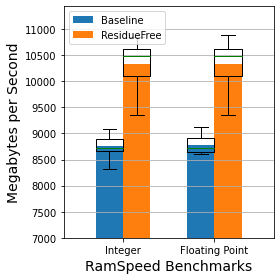

In [7]:
## RAM FIGURE PLOT ##
fig, ax = plt.subplots() 
Ram_ind = np.arange(len(Ram_Baseline_Avgs))
Ram_width = .3
Diff = Ram_width/2
Ram_ylabel = "Megabytes per Second"
Ram_xlabel = "RamSpeed Benchmarks"

Ram_BarBase = ax.bar(Ram_ind - Diff, Ram_Baseline_Avgs, Ram_width, label='Baseline') #No error bars b/c boxplots
Ram_BarRes = ax.bar(Ram_ind + Diff, Ram_Residue_Avgs, Ram_width, label='ResidueFree')
ax.boxplot(Ram_boxplots, positions=[0-Diff,0+Diff,1-Diff,1+Diff], widths=Ram_width, medianprops=dict(color='green'))


ax.set_ylabel(Ram_ylabel, fontsize=14)
ax.set_xlabel(Ram_xlabel, fontsize=14)
ax.set_xticks(Ram_ind) 
xlabels = [var.split('_')[1] for var in Ram_varnames]
xlabels = [var.replace('P',' P') for var in xlabels]
ax.set_xticklabels(xlabels) 
ax.legend( (Ram_BarBase, Ram_BarRes), ('Baseline','ResidueFree'), loc='upper left' )

GRAPH_HEIGHT=4
fig.set_size_inches(4, GRAPH_HEIGHT, forward=True)
fig.tight_layout()
plt.grid(b=True,which="major",axis="y")
plt.style.use('tableau-colorblind10')
plt.ylim(bottom=7000)
plt.savefig("./Figures/RamSpeed.pdf")
plt.show()

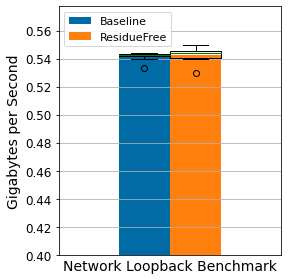

In [8]:
#LOOPBACK FIGURE PLOT#
fig, ax = plt.subplots() 
Loop_ind = np.arange(len(Loop_Baseline_Avgs)) 
Loop_width = .3 
Diff = Loop_width/2
Loop_ylabel = "Gigabytes per Second"
Loop_xlabel = "Network Loopback Benchmark"

Loop_BarBase = ax.bar(Loop_ind - Diff, Loop_Baseline_Avgs, Loop_width, label='Baseline') 
Loop_BarRes = ax.bar(Loop_ind + Diff, Loop_Residue_Avgs, Loop_width, label='ResidueFree')
ax.boxplot(Loop_boxplots, positions=[0-Diff,0+Diff], widths=Loop_width, medianprops=dict(color='green'))

ax.set_ylabel(Loop_ylabel, fontsize=14)
ax.set_xlabel(Loop_xlabel, fontsize=14)
ax.legend( (Loop_BarBase, Loop_BarRes), ('Baseline','ResidueFree'), fontsize=11 )
plt.yticks(fontsize=12)
plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)

GRAPH_HEIGHT = 4
fig.set_size_inches(4, GRAPH_HEIGHT, forward=True)
fig.tight_layout() 
plt.grid(b=True,which="major",axis="y")
plt.style.use('tableau-colorblind10')
plt.ylim(bottom=0.4)
plt.savefig("./Figures/Loopback.pdf")
plt.show()

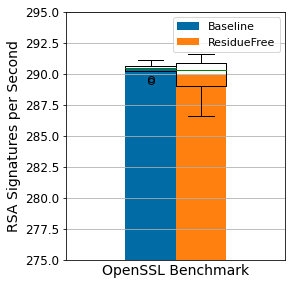

In [9]:
#SSL FIGURE PLOT
fig, ax = plt.subplots() 
SSL_ind = np.arange(len(SSL_Baseline_Avgs)) 
SSL_width = .3 
Diff = SSL_width/2
SSL_ylabel = "RSA Signatures per Second"
SSL_xlabel = "OpenSSL Benchmark"

SSL_BarBase = ax.bar(SSL_ind - Diff, SSL_Baseline_Avgs, SSL_width, label='Baseline') 
SSL_BarRes = ax.bar(SSL_ind + Diff, SSL_Residue_Avgs, SSL_width, label='ResidueFree')
ax.boxplot(SSL_boxplots, positions=[0-Diff,0+Diff], widths=SSL_width, medianprops=dict(color='green'))

ax.legend( (SSL_BarBase, SSL_BarRes), ('Baseline','ResidueFree'), fontsize=11 )
ax.set_ylabel(SSL_ylabel, fontsize=14)
ax.set_xlabel(SSL_xlabel, fontsize=14)
fig.set_size_inches(4, 4, forward=True)
plt.yticks(fontsize=12)
plt.tick_params(axis='x', which='both',bottom=False,top=False,labelbottom=False)

GRAPH_HEIGHT=4
fig.set_size_inches(4, GRAPH_HEIGHT, forward=True)
fig.tight_layout()
plt.grid(b=True,which="major",axis="y")
plt.style.use('tableau-colorblind10')
plt.ylim(bottom=275,top=295)
plt.savefig("./Figures/OpenSSL.pdf")
plt.show()

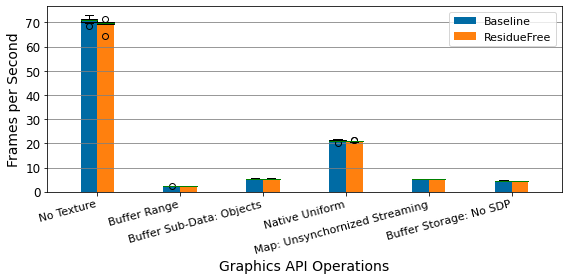

In [10]:
## API FIGURE PLOT ##

# Because so many API tests, create arrays of only 1/3rd of tests that will be shown in the figure
g_API_Baseline_Avgs = []
g_API_Residue_Avgs = []
g_API_Baseline_Stds = []
g_API_Residue_Stds = []
g_API_varnames = []
g_API_boxplots = []
g_API_boxplots = []

# Put one out of every three elements from the existing arrays into the graph ones.
for i in range(0,len(API_Baseline_Avgs)):
    if i % 3 == 2:
        g_API_Baseline_Avgs.append(API_Baseline_Avgs[i]) 
        g_API_Residue_Avgs.append(API_Residue_Avgs[i])
        g_API_Baseline_Stds.append(API_Baseline_Stds[i])
        g_API_Residue_Stds.append(API_Residue_Stds[i])
        g_API_varnames.append(API_varnames[i])
        g_API_boxplots.append(API_boxplots[i*2]) #Boxplot array has baseline and residue free next to one another
        g_API_boxplots.append(API_boxplots[(i*2)+1])

fig, ax = plt.subplots() 
g_API_ind = np.arange(len(g_API_Baseline_Avgs)) 
g_API_width = .2
Diff = g_API_width/2
g_API_ylabel = "Frames per Second"
g_API_xlabel = "Graphics API Operations"

postns = [] # positions - really indices, for where to put boxplots on top of bar charts
for pos in g_API_ind:
    postns.append(pos-Diff)
    postns.append(pos+Diff)
g_API_BarBase = ax.bar(g_API_ind - Diff, g_API_Baseline_Avgs, g_API_width, label='Baseline') 
g_API_BarRes = ax.bar(g_API_ind + Diff, g_API_Residue_Avgs, g_API_width, label='ResidueFree')
ax.boxplot(g_API_boxplots, positions=postns, widths=g_API_width, medianprops=dict(color='green'))

ax.set_ylabel(g_API_ylabel, fontsize=14)
ax.set_xlabel(g_API_xlabel, fontsize=14)
ax.set_xticks(g_API_ind)

''' Trimming variable names produces results that are still too long
xlabels = [var.split('_res')[0] for var in g_API_varnames]
xlabels = [var.split('GL')[1] for var in xlabels]
xlabels = [var.replace('_',' ')for var in xlabels]
'''
# Manually label test names for clarity
xlabels = ['No Texture', 'Buffer Range', 'Buffer Sub-Data: Objects', 'Native Uniform', 'Map: Unsynchornized Streaming', 'Buffer Storage: No SDP']
ax.set_xticklabels(xlabels, fontsize=11, rotation=15, ha='right') 
ax.legend( (g_API_BarBase, g_API_BarRes), ('Baseline','ResidueFree'), fontsize=11 )
plt.yticks(fontsize=12)

#Figure presentability
GRAPH_HEIGHT=4
fig.set_size_inches(8, GRAPH_HEIGHT, forward=True)
plt.grid(b=True,which="major",axis="y",color='gray')
fig.tight_layout() 
plt.style.use('tableau-colorblind10')
plt.savefig("./Figures/API.pdf")
plt.show()

In [11]:
# Compare Network Loopback speeds in ResidueFree vs normal 
print(np.mean(ResidueFree.Loopback_results)) 
print(np.mean(Baseline.Loopback_results))
print(np.mean(ResidueFree.Loopback_results)/np.mean(ResidueFree.Loopback_results))

0.5427009745619849
0.5416115252036903
1.0


In [12]:
# Compare OpenSSL encryption speeds in ResidueFree vs normal 
print(np.mean(ResidueFree.OpenSSL_results)) 
print(np.mean(Baseline.OpenSSL_results))
print(np.mean(ResidueFree.OpenSSL_results)/np.mean(Baseline.OpenSSL_results))

289.896
290.385
0.9983160287204919


In [13]:
# Compare RAM speeds in ResidueFree vs normal 
print(np.mean(Ram_Residue_Avgs))
print(np.mean(Ram_Baseline_Avgs))
print(np.mean(Ram_Residue_Avgs) / np.mean(Ram_Baseline_Avgs))

10325.518
8771.003
1.1772334361303947


In [14]:
# Compare Graphics API operations in ResidueFree vs normal 
print(np.mean(API_Residue_Avgs))
print(np.mean(API_Baseline_Avgs))
print(np.mean(API_Residue_Avgs) / np.mean(API_Baseline_Avgs))

13.825449999999998
14.0361
0.9849922699325311
